In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import os 

## EXPLORAÇÃO DOS DADOS

### ANÁLISES DESCRITIVAS

In [2]:
# Conectando com o db
db_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'data', 'ML_db.db'))
conn = sqlite3.connect(db_path)
# Retornando dado sem um df 
df = pd.read_sql_query("SELECT * FROM mercadolivre_veiculos", conn)
df.head()

,marca,modelo,valor,ano,KM,tipo_combustivel,transmissao,motor,ar_condicionado,cor,portas,direcao,vidros_eletricos,local,uf,link,data_coleta
0,volkswagen,Kombi 1.4 Standard Total Flex 3p,42000.0,2011.0,20400.0,Gasolina e álcool,Manual,1.4,None,None,3.0,None,None,Palmas,TO,https://carro.mercadolivre.com.br/MLB-36802471...,2024-06-23 00:00:00
1,volkswagen,Voyage 1.0 MPI (Flex),59150.0,2023.0,5436.0,Gasolina e álcool,Manual,1.0,Sim,Preto,4.0,Mecânica,Sim,Manaus,AM,https://carro.mercadolivre.com.br/MLB-37147346...,2024-06-23 00:00:00
2,volkswagen,Gol 1.0 12v (Flex),56400.0,2023.0,3980.0,Gasolina e álcool,Manual,1.0,Sim,Branco,4.0,Mecânica,Sim,Manaus,AM,https://carro.mercadolivre.com.br/MLB-37469124...,2024-06-23 00:00:00
3,volkswagen,Jetta 1.4 250 Tsi Comfortline,112700.0,2020.0,3857.0,Gasolina e álcool,Automática,1.4,Sim,Branco,4.0,Elétrica,Sim,Manaus,AM,https://carro.mercadolivre.com.br/MLB-47465682...,2024-06-23 00:00:00
4,volkswagen,Voyage 1.0 MPI (Flex),59220.0,2023.0,4900.0,Gasolina e álcool,Manual,1.0,Sim,Branco,4.0,Mecânica,Sim,Manaus,AM,https://carro.mercadolivre.com.br/MLB-37492646...,2024-06-23 00:00:00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13601 entries, 0 to 13600
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   marca             13601 non-null  object 
 1   modelo            13599 non-null  object 
 2   valor             13601 non-null  float64
 3   ano               13598 non-null  float64
 4   KM                13103 non-null  float64
 5   tipo_combustivel  13598 non-null  object 
 6   transmissao       13495 non-null  object 
 7   motor             12866 non-null  float64
 8   ar_condicionado   11787 non-null  object 
 9   cor               11630 non-null  object 
 10  portas            13598 non-null  float64
 11  direcao           13283 non-null  object 
 12  vidros_eletricos  8529 non-null   object 
 13  local             13601 non-null  object 
 14  uf                12684 non-null  object 
 15  link              13601 non-null  object 
 16  data_coleta       13601 non-null  object

In [4]:
df.describe().round()

,valor,ano,KM,motor,portas
count,13601.0,13598.0,13103.0,1.286600e+04,13598.0
mean,94770.0,2018.0,9861.0,8.845200e+04,4.0
std,97720.0,5.0,34276.0,9.987873e+06,3.0
min,4000.0,1969.0,10.0,0.000000e+00,0.0
25%,49900.0,2015.0,4998.0,1.000000e+00,4.0
50%,70990.0,2018.0,7500.0,2.000000e+00,4.0
75%,109900.0,2022.0,11100.0,2.000000e+00,4.0
max,4250000.0,2025.0,999999.0,1.132897e+09,315.0


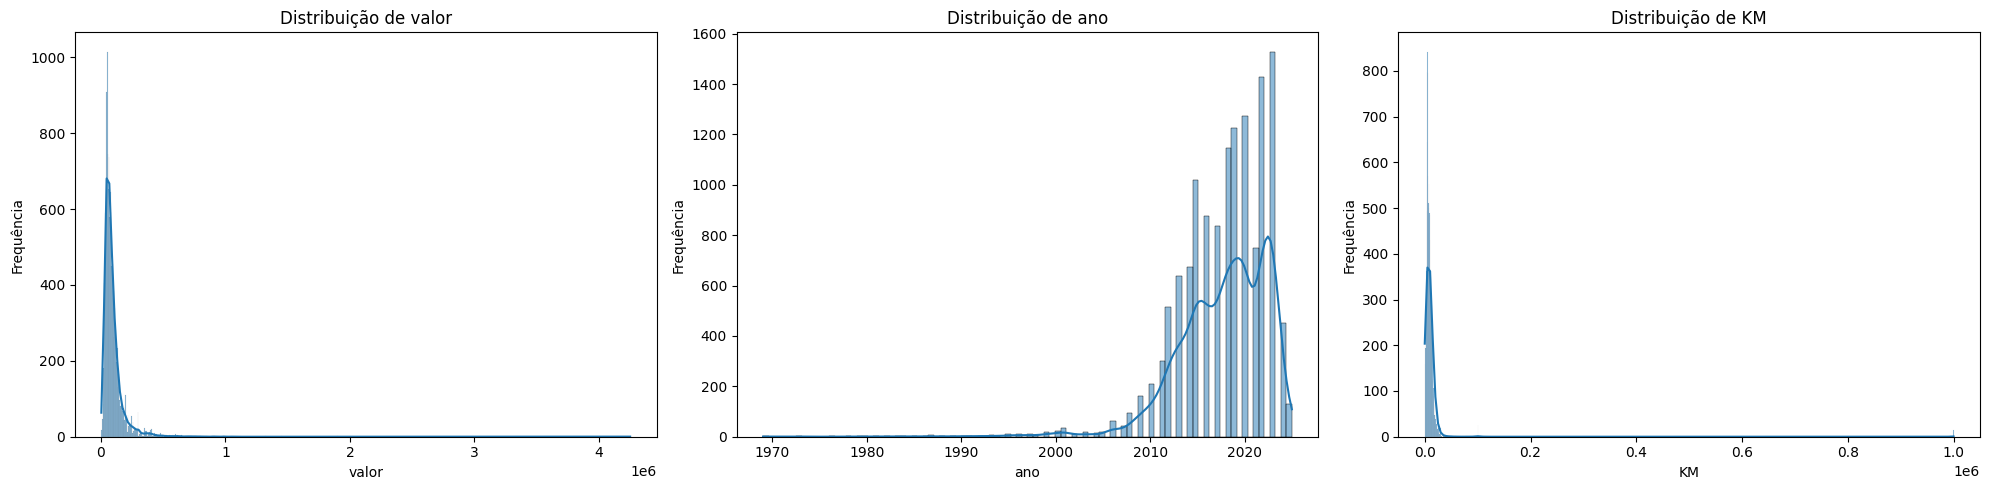

In [5]:
# ---- Analisando distribuição numerica
col_n = ['valor','ano','KM']

fig, axes = plt.subplots(1, len(col_n), figsize=(20, 5))

# Iterando sobre as colunas numéricas para criar histogramas
for i, col in enumerate(col_n):
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribuição de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

Os gráficos representam a distribuição de frequência de três variáveis numéricas: valor, ano e KM.

1. Distribuição de valor:

O histograma mostra que a distribuição do valor é assimétrica à direita, com uma maior concentração de dados nos valores mais baixos.

2. Distribuição de ano:

O histograma do ano mostra uma distribuição aproximadamente normal, com uma maior concentração de dados em torno do ano 2000.
A curva KDE confirma a normalidade, com uma curva simétrica em torno do ano 2000.
O ano mínimo é de aproximadamente 1970, enquanto o ano máximo é de aproximadamente 2020.

3. Distribuição de KM:

O histograma do KM mostra uma distribuição assimétrica à direita, com uma maior concentração de dados nos valores mais baixos.
Também podemos confirmar com a curva KDE a assimetria.
O KM mínimo é de aproximadamente 0, enquanto o KM máximo é de aproximadamente 1200.


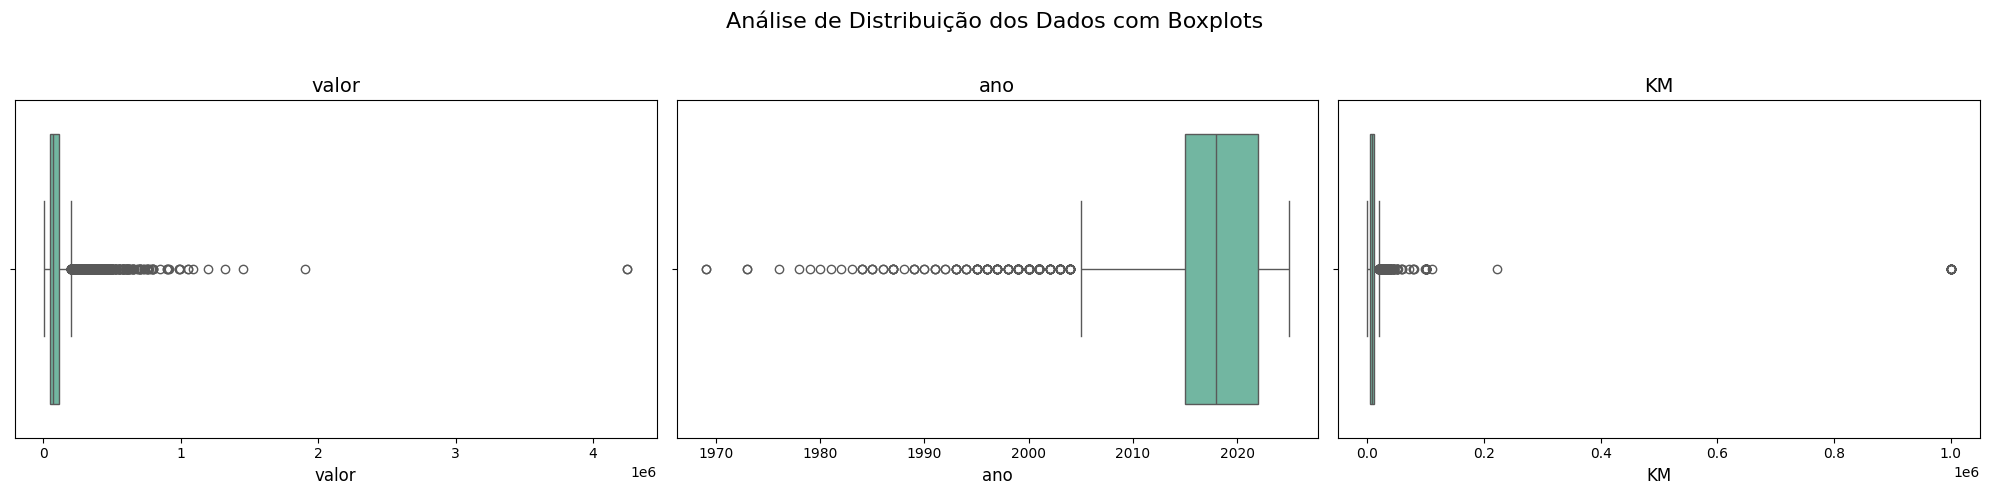

In [6]:
# ---- Analisando distribuição dos dados usando um BOXPLOT

# Criando a figura com subplots
fig, axes = plt.subplots(1, len(col_n), figsize=(20, 5))
# Definindo a paleta de cores
palette = sns.color_palette("Set2")

# Iterando sobre as colunas numéricas para criar boxplots horizontais
for i, col in enumerate(col_n):
    sns.boxplot(x=df[col], ax=axes[i], palette=palette)
    axes[i].set_title(f'{col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=10)
    axes[i].tick_params(axis='y', labelsize=10)

# Adicionando um título principal à figura
plt.suptitle('Análise de Distribuição dos Dados com Boxplots', fontsize=16)

# Ajustando o layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Os gráficos representam Análise de Distribuição dos Dados com Boxplots: valor, ano e KM.

1. valor:
O boxplot mostra uma mediana próxima a 0, com outliers que se estendem de aproximadamente 1 a pouco mais de 3. 
Os valores nesse boxplot estão na faixa dos milhões. Portanto, a mediana próxima de 0 na verdade representa um valor de 500.000, e os outliers que vão até 4 representam valores na casa dos 4 milhões. 
Valores esses que podem ser confirmado acima na analise que foi feita usando método `describe()`


2. ano

O boxplot mostra uma distribuição com a mediana em torno do ano 2000. A ausência de outliers sugere que não há anos atípicos ou extremos no conjunto de dados com pouca variação entre eles.

3. KM:

O boxplot tem uma mediana ligeiramente abaixo de 0,5. Os outliers são visíveis em ambos os lados, indicando a presença de valores de quilometragem muito baixos e muito altos em comparação com a maioria dos dados.


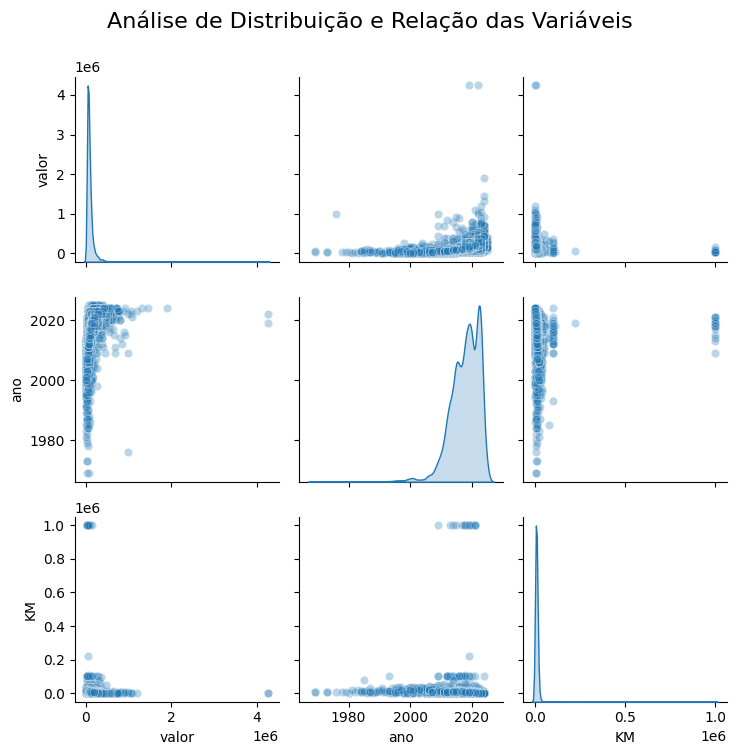

In [14]:
#------ Analisando a distribuição e relação de todas as variáveis.

# Criando o pairplot com seaborn
sns.pairplot(df[col_n], diag_kind='kde', plot_kws={'alpha':0.3}, diag_kws={'shade':True})
# Adicionando um título principal
plt.suptitle('Análise de Distribuição e Relação das Variáveis', y=1, fontsize=16)
# Ajustando o layout
plt.tight_layout()
plt.show()

### O que os gráficos de distribuição de todas as variáveis nos mostram?

* Valor vs. Ano: Este gráfico ilustra a relação entre o preço dos carros e o ano de fabricação. Em geral, observa-se que carros mais novos tendem a ter preços mais altos.

* Ano vs. Quilometragem (KM): Este gráfico mostra a relação entre o ano de fabricação e a quilometragem dos carros. Carros mais novos normalmente apresentam menor quilometragem, pois foram utilizados por menos tempo.

* Valor vs. Quilometragem (KM): Este gráfico apresenta como o preço dos carros se relaciona com a quilometragem. Carros com menos quilômetros rodados tendem a ser mais caros, indicando que a menor utilização aumenta o valor de mercado.

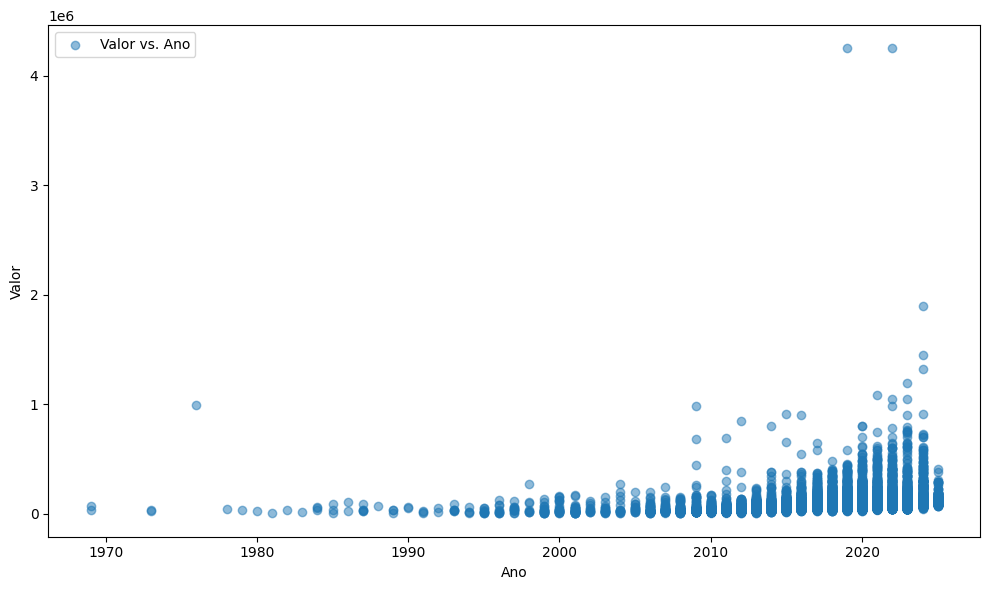

In [19]:
plt.figure(figsize=(10, 6))
# Valor vs. Ano
plt.scatter(df['ano'], df['valor'], alpha=0.5, label='Valor vs. Ano')
# Adicionando títulos e rótulos
plt.xlabel('Ano')
plt.ylabel('Valor')
plt.legend()
plt.tight_layout()
